## Kết nối đến thư mục Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
project_path = '/content/drive/MyDrive/Project-EdgeAI/ModelAI/M12K03_EdgeAI_MachineLearning_1'
os.chdir(project_path)

print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/Project-EdgeAI/ModelAI/M12K03_EdgeAI_MachineLearning_1


### Đọc Data và chia nhóm

#### Load data từ File đã trích xuất đặc trưng từ trước

In [4]:
import glob
import os

with open(rf'HeartRate/features.txt', 'r') as txt_file:
  data_lst = [[float(ele_str) for ele_str in txt.strip().split(' ')] for txt in txt_file.readlines()]

print(f'Tổng số mẫu: {len(data_lst)}')
print(f'Mẫu dữ liệu ({len(data_lst[0])}): {data_lst[0]}')

Tổng số mẫu: 94
Mẫu dữ liệu (30): [70.8, 0.20474853342910948, 50.88500092702066, -0.06410439274102571, 309.9821405648006, 1208.0792682926829, 229.02790288937203, 1125.0, 177.64723378941105, 100.0, 850.0, 1093.75, 1375.0, 1406.25, 281.25, 309.9782991959482, 161.94718321400904, 219.18775738212747, 1.3534521134120405, 1.9431936148641753, 33.042061931682674, 152.8301424405276, 3301.689269495722, 0.0005885452737231586, 0.010007623139148191, 0.04628846931554824, 0.21620121138433593, 1.2040230795930345, 6.821311751884044, 11.472325674696231]


#### Chia tập dữ liệu thành tập Train (70%), Validation (20%) và Test (10%)

In [6]:
import random
import numpy as np
random.shuffle(data_lst)

train_total = len(data_lst)*0.7
valid_total = len(data_lst)*0.2
test_total = len(data_lst)*0.1
X_train = []
y_train = []
X_valid = []
y_valid = []
X_test = []
y_test = []
for idx, data in enumerate(data_lst):
  if idx < train_total:
    X_lst = X_train
    y_lst = y_train
  elif idx < (train_total+valid_total):
    X_lst = X_valid
    y_lst = y_valid
  else:
    X_lst = X_test
    y_lst = y_test
  X_lst.append(data[1:])
  y_lst.append(data[:1])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(f'Tổng số dữ liệu Train: {X_train.shape[0]} ({(X_train.shape[0]/len(data_lst)):.2f}) {y_train[0]} {X_train[0]}')
print(f'Tổng số dữ liệu Validation: {X_valid.shape[0]} ({(X_valid.shape[0]/len(data_lst)):.2f}) {y_valid[0]} {X_valid[0]}')
print(f'Tổng số dữ liệu Test: {X_test.shape[0]} ({(X_test.shape[0]/len(data_lst)):.2f}) {y_test[0]} {X_test[0]}')

Tổng số dữ liệu Train: 66 (0.70) [67.37] [ 1.61682716e-01  6.56650702e+01 -8.99861073e-03  3.85100162e+02
  9.78247549e+02  2.91046343e+02  1.37500000e+03  2.16094771e+02
  1.00000000e+02  7.18750000e+02  7.81250000e+02  1.06250000e+03
  1.43750000e+03  2.81250000e+02  3.85099665e+02  2.05800843e+02
  2.72306585e+02  1.32315583e+00  1.30733607e+01  1.11360259e+02
  3.85222908e+02  5.00161753e+03  2.61382655e-03  2.22648490e-02
  7.70196653e-02  2.89080055e-01  4.06234187e+00  2.17634663e+01
  3.42536440e+01]
Tổng số dữ liệu Validation: 19 (0.20) [95.02] [ 1.27225744e-01  6.63376603e+01 -2.62432635e-02  4.47593953e+02
  9.73651961e+02  2.99379755e+02  1.59375000e+03  2.47512976e+02
  1.00000000e+02  6.56250000e+02  7.18750000e+02  1.17968750e+03
  1.34062500e+03  4.60937500e+02  4.47593525e+02  2.11693455e+02
  3.16496417e+02  1.49506945e+00  7.10688131e+00  8.37219320e+01
  3.96573673e+02  7.37073790e+03  9.64202147e-04  1.13586907e-02
  5.38037953e-02  2.11113187e-01  2.06153399e+00  

### Tạo Model

#### Import thư viện

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Reshape, MaxPooling1D, ReLU, Flatten

#### Cấu hình Model

In [8]:
input_shape = 29
output_shape = 1

In [9]:
model = Sequential()
model.add(Reshape((1, input_shape), input_shape=(input_shape, )))
model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(Conv1D(64, 1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_shape, name='y_pred'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model = Sequential([
  Reshape((1, input_shape), input_shape=(input_shape, )),
  Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'),
  MaxPooling1D(pool_size=2, strides=2, padding='same'),
  Conv1D(64, 1, activation='relu'),
  Dropout(0.3),
  Dense(30, activation='relu'),
  Dropout(0.3),
  Dense(10, activation='relu'),
  Dropout(0.5),
  Dense(output_shape, name='y_pred')
])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 1, 29)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 8)                │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 64)               │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 30)               │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 10)               │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 10)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ y_pred (Dense)                       │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,551 (13.87 KB)

 Trainable params: 3,551 (13.87 KB)

 Non-trainable params: 0 (0.00 B)

### Tạo Loss Function, Optimizer, Training

#### Thiết lập thông số Train

In [12]:
learning_rate = 0.01  # Tốc độ học
epochs = 5000  # Số chu kỳ huấn luyện
batch_size = 32  # Số dữ liệu cho 1 batch

#### Huấn luyện

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

class EpochLogger(Callback):
    def __init__(self, display_step):
        super(EpochLogger, self).__init__()
        self.display_step = display_step

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.display_step == 0:
            print(f"Epoch {epoch + 1}/{self.params['epochs']} - loss: {logs['loss']:.4f}" + \
                  (f", val_loss: {logs['val_loss']:.4f}" if 'val_loss' in logs else ""))


early_stopping = EarlyStopping(
    monitor="val_loss",  # Theo dõi giá trị 'val_loss'
    patience=100,         # Số epoch chờ trước khi dừng
    verbose=1,           # Hiển thị thông báo khi dừng
    restore_best_weights=True  # Phục hồi trọng số tốt nhất
)

In [14]:
from tensorflow.keras.optimizers import Adam
import numpy as np

epoch_logger = EpochLogger(display_step=10)
checkpoint = ModelCheckpoint(filepath="HeartRate/best_model.keras", monitor="val_loss", save_best_only=True, verbose=0)

opt = Adam(learning_rate=learning_rate)
model.compile(loss='mse', optimizer=opt)

In [15]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), verbose=0, batch_size=batch_size, callbacks=[checkpoint, epoch_logger, early_stopping], shuffle=True)

Epoch 10/5000 - loss: 3330.4158, val_loss: 4070.6621
Epoch 20/5000 - loss: 2543.5520, val_loss: 2517.3955
Epoch 30/5000 - loss: 2457.3972, val_loss: 1223.5159
Epoch 40/5000 - loss: 1806.0317, val_loss: 959.4480
Epoch 50/5000 - loss: 1565.4644, val_loss: 846.3409
Epoch 60/5000 - loss: 2068.5774, val_loss: 1318.5234
Epoch 70/5000 - loss: 1693.5281, val_loss: 260.4551
Epoch 80/5000 - loss: 1978.0225, val_loss: 600.8474
Epoch 90/5000 - loss: 1811.8247, val_loss: 541.9118
Epoch 100/5000 - loss: 1383.3867, val_loss: 1386.6791
Epoch 110/5000 - loss: 1843.8375, val_loss: 1472.7671
Epoch 120/5000 - loss: 1881.4742, val_loss: 1329.6344
Epoch 130/5000 - loss: 2026.9247, val_loss: 2534.6660
Epoch 140/5000 - loss: 1728.0200, val_loss: 3557.5366
Epoch 150/5000 - loss: 1323.8804, val_loss: 677.1702
Epoch 160/5000 - loss: 1369.9786, val_loss: 836.2147
Epoch 170/5000 - loss: 1471.0535, val_loss: 684.5840
Epoch 180/5000 - loss: 817.9268, val_loss: 567.4409
Epoch 190/5000 - loss: 1762.3507, val_loss: 204

#### Vẽ đồ thị quá trình huấn luyện

In [16]:
import matplotlib.pyplot as plt


# Hàm vẽ đồ thị lịch sử huấn luyện
def plot_training_history(history, step=5):
    """
    Vẽ đồ thị lịch sử huấn luyện của mô hình, hiển thị một số epoch nhất định.

    Tham số:
    - history: Kết quả lịch sử huấn luyện từ model.fit().
    - step: Khoảng cách giữa các epoch được hiển thị.
    """
    plt.figure(figsize=(12, 6))

    # Vẽ loss với khoảng cách epoch
    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['loss'], label='Train Loss', color='blue', linewidth=2)
    if 'val_loss' in history.history:
        plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)

    # Thêm chú thích
    plt.title('Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

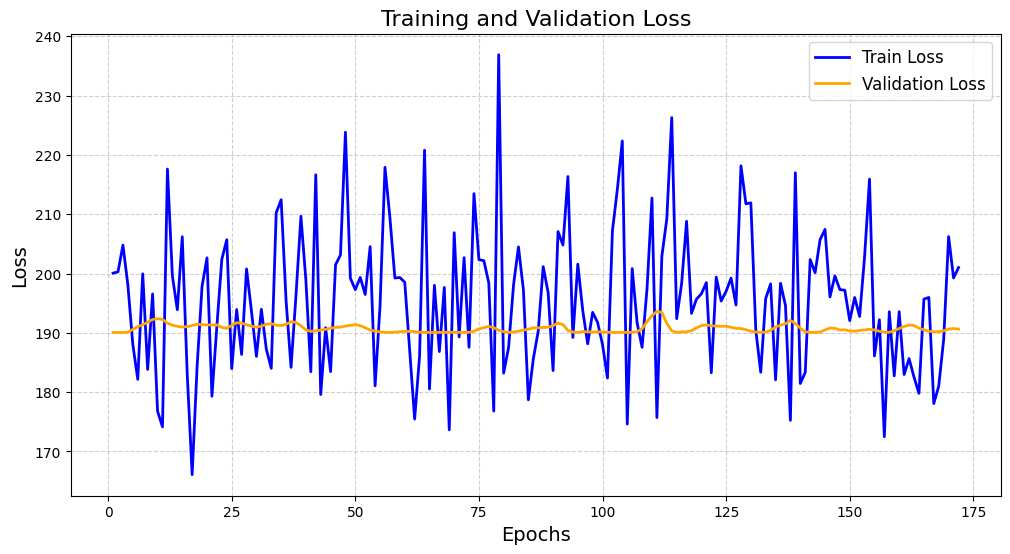

In [ ]:
plot_training_history(history, step=10)

#### Đánh giá mô hình

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Đánh giá hiệu năng mô hình nếu có tập validation
metrics = {}
y_pred = model.predict(X_test)
print(y_test.squeeze().shape, y_pred.squeeze().shape)
mse = mean_squared_error(y_test.squeeze(), y_pred.squeeze())
mae = mean_absolute_error(y_test.squeeze(), y_pred.squeeze())
evs = explained_variance_score(y_test.squeeze(), y_pred.squeeze())
loss = model.evaluate(X_test, y_test, verbose=0)
metrics = {
    "mean_squared_error": mse,
    "mean_absolute_error": mae,
    "explained_variance_score": evs,
    "loss": loss
}

print(metrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
(9,) (9,)
{'mean_squared_error': 281.0670600699114, 'mean_absolute_error': 12.747705891927085, 'explained_variance_score': 0.0, 'loss': 281.0670471191406}


#### Chạy thử mô hình

In [17]:
idx = random.randint(0, X_train.shape[0])
print(f'y_target: {y_train[idx][0]} | y_predict: {model.predict(np.expand_dims(X_train[idx], axis=0)).squeeze()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
y_target: 80.13 | y_predict: 67.80701446533203
